# Task 2: Unsupervised Learning

## 1. Introduction

Unsupervised learning is a method of machine learning where no pre-labelled training examples are given and the input information is automatically classified or clustered [2]. In recent years, unsupervised learning techniques such as clustering, dimensionality reduction, and generative models have been applied to a wide range of building data, including building energy consumption, indoor environmental quality, and occupant behavior [16].

This research aims to explore the use of unsupervised learning in the smart building field through a case study of how cluster algorithms can be used to process building sensor data to classify indoor thermal environments. At the end of this task, the potential of this approach to create more sustainable, efficient, and comfortable built environments is discussed.

In order to achieve this aim, the following objectives will be to:

- process the building sensor data and select the data relevant to the indoor thermal environment;
- select the number of clusters and process the data using the k-means clustering algorithm;
- analyse its significance in the built environment based on the clustering results.

The remainder of this report is ordered as follows. Chapter 2 details the ML algorithm used in this task and its theory. Chapter 3 presents the methodology for implementing ML-based clustering of indoor thermal environments. Chapter 4 presents an analysis and discussion of the clustering results produced by the different ML algorithms. Chapter 5 provides conclusions and recommendations for future work.


## 2. Theory

This task will use the K-means clustering algorithm, which is an unsupervised machine-learning algorithm used to group or cluster data sets into groups or clusters based on the similarity of their attributes. The working principle of this algorithm can be summarised in the following steps [17]. Firstly, defining K clusters and then iteratively assigning each data point to the nearest cluster centroid based on their distance. The centroid is the average of all data points in the cluster. After all data points have been assigned, the centroid of each cluster is updated by calculating the average of all data points in that cluster. This process is repeated until the centroids no longer change, or the maximum number of iterations is reached [17]. In this task, the Euclidean distance will be used to determine the distance between each data point and the mathematical definition of Euclidean distance is as the following Equaiton.

**Equation 5:** 
$$d(x,y)= \sqrt{\sum_{i=1}^{n}(x_i-y_i)^2}$$

where, $d$ is the Euclidean distance, $x_i$ is the i-th query point, and $y_i$ is the i-th point in the training dataset.

## 3. Methods

Figure 8 shows the flow chart for the case study in Task 2. The section will detail the data set used for clustering, the method of selecting the number of classes, and the code implementation process.
![jupyter](./p3.png)
*Fig.8 Method for clustering model design*

### 3.1 Dataset Description

The task will use the building sensor data to classify different indoor thermal environments. In this task, the same data set in Task 1 will be used and the authors only kept the original data related to indoor thermal comfort, such as indoor temperature as well as indoor humidity. The data set contains 17 features from December 2013 to March 2014, which are sensor data for indoor temperature and indoor humidity in different rooms [10], and the data file is included in the attachment.

### 3.2 Number of Cluster k Selection

The elbow method will be used to determine the number of clusters. This method involves comparing the sum of squares (WCSS) within the clusters to the number of clusters, K, and selecting the value of K where the WCSS decreases at a slower rate, resulting in an 'elbow' shape in the graph [18]. The position of the elbow in the graph is usually considered to be an indicator of the appropriate number of clusters.

### 3.3 Result Graphical Interpretation Method

This study will use PCA and Silhouette visualisation techniques to assess the uniformity of the clustering results. The PCA will show how well separated the cluster is directly from a graph [18]. Meanwhile, the Silhouette method will show the distance between each data point in each class and the neighbouring classes through a matrix, and a higher score means a better separation [18].

### 3.4 Code Implementation

#### Step 1: Import Data

In [3]:
import pandas as pd
# import matplotlib
import matplotlib.pyplot as plt
# import seaborn
import seaborn as se
import pandas as pd
#PyCaret_SetupClustering
from pycaret.clustering import *


pd.options.display.max_columns = 30
#Load Dataset from local .csv file
pyc_dataset_id1 = pd.read_csv ('Task2_data.csv')
pyc_dataset_id1.head()
# Print dataset
print(pyc_dataset_id1.dtypes)

dateTime_ix                      object
Relative humidity_Livingroom    float64
Air temperature_Livingroom      float64
Air temperature_Kitchen         float64
Relative humidity_Kitchen       float64
Air temperature_Utilityroom     float64
Air temperature_Hallway         float64
Air temperature_Storageroom     float64
Air temperature_Conservatory    float64
Air temperature_Bathroom        float64
Air temperature_Bedroom1        float64
Relative humidity_Bedroom1      float64
Air temperature_Stairs          float64
Relative humidity_Bedroom2      float64
Air temperature_Bedroom2        float64
Air temperature_Bedroom3        float64
dtype: object


In [4]:
pyc_dataset_id1.shape

(5342, 16)

#### Step 2: Clustering Model Setup

In [5]:
#Setup
setup_table_id2 = setup(data = pyc_dataset_id1, session_id=123, silent=True, 
                        ignore_features=['dateTime_ix'], normalize=True)

,Description,Value
0,session_id,123
1,Original Data,"(5342, 16)"
2,Missing Values,False
3,Numeric Features,15
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(5342, 15)"
9,CPU Jobs,-1


In [11]:
#PyCaret_SetupClustering
transformed_data_X=get_config('X')

In [12]:
#PyCaret_SetupClustering
print(transformed_data_X.dtypes)

Relative humidity_Livingroom    float32
Air temperature_Livingroom      float32
Air temperature_Kitchen         float32
Relative humidity_Kitchen       float32
Air temperature_Utilityroom     float32
Air temperature_Hallway         float32
Air temperature_Storageroom     float32
Air temperature_Conservatory    float32
Air temperature_Bathroom        float32
Air temperature_Bedroom1        float32
Relative humidity_Bedroom1      float32
Air temperature_Stairs          float32
Relative humidity_Bedroom2      float32
Air temperature_Bedroom2        float32
Air temperature_Bedroom3        float32
dtype: object


In [13]:
#PyCaret_Clustering
#Create initial model and set the default number of clusters as 3.
pyc_clustering_model_id3 = create_model('kmeans', num_clusters = 3)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.269,2817.0897,1.3323,0,0,0


In [14]:
#PyCaret_Clustering
#Print the model
print(pyc_clustering_model_id3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0)


#### Step 3: Number of Cluster Selection

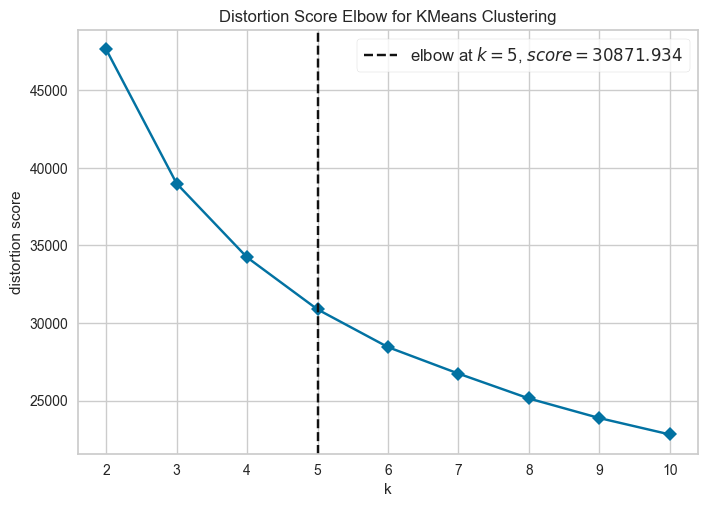

In [15]:
#PyCaret_Clustering
plot_model(pyc_clustering_model_id3, plot='elbow')

*Fig.9 Result of Elbow Method*

In [16]:
#Update model and set the default number of clusters as 5.
pyc_clustering_model_id3 = create_model('kmeans', num_clusters = 5)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2123,2128.8774,1.347,0,0,0


#### Step 4: Apply Model

In [17]:
#PyCaret_Clustering
#Assign model
clustering_results_id3 = assign_model(pyc_clustering_model_id3)
clustering_results_id3.head()

,dateTime_ix,Relative humidity_Livingroom,Air temperature_Livingroom,Air temperature_Kitchen,Relative humidity_Kitchen,Air temperature_Utilityroom,Air temperature_Hallway,Air temperature_Storageroom,Air temperature_Conservatory,Air temperature_Bathroom,Air temperature_Bedroom1,Relative humidity_Bedroom1,Air temperature_Stairs,Relative humidity_Bedroom2,Air temperature_Bedroom2,Air temperature_Bedroom3,Cluster
0,2013-12-03 18:00:00+00:00,55.530,18.771,18.521,49.034,20.627,18.045,20.329,22.908,19.948,15.569,48.267,20.555,49.937,17.962,13.654,Cluster 4
1,2013-12-03 18:30:00+00:00,54.117,19.651,18.996,48.754,21.390,18.616,21.091,25.610,21.282,15.664,46.950,21.175,49.692,18.699,13.461,Cluster 2
2,2013-12-03 19:00:00+00:00,57.352,20.484,19.948,59.011,23.881,19.092,21.760,25.805,22.238,15.664,46.251,21.700,49.269,19.294,13.365,Cluster 2
3,2013-12-03 19:30:00+00:00,60.057,21.366,20.234,54.694,23.881,19.472,22.142,25.708,22.717,15.664,45.739,21.963,48.721,19.674,13.365,Cluster 2
4,2013-12-03 20:00:00+00:00,57.949,21.987,20.329,49.262,23.833,19.758,22.429,25.708,22.908,15.760,45.600,22.130,48.380,19.960,13.365,Cluster 2


## 4. Results

As can be seen in Figures 2 and 3, the model divides the indoor environment into five categories. According to the result, the average silhouette score of around 0.2, which typically indicates that the clusters are somewhat separable, but there is still overlap between them. It suggests that while some of the data points are well-clustered, others might be better placed in a different cluster or may not belong to any cluster at all.

**Center Point Plot**

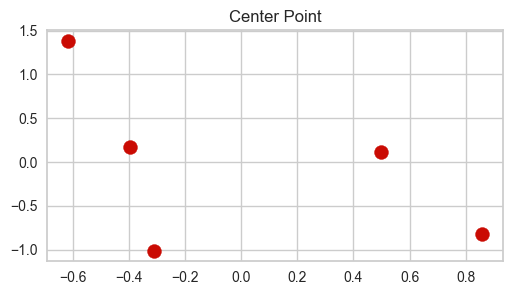

In [50]:
# Plot the center point of each cluster
denters=pyc_clustering_model_id3.cluster_centers_ 
fig=plt.figure(figsize=(20,3))
ax1=plt.subplot(131)
ax1.scatter(denters[:,0],denters[:,1],c='r',s=100)
plt.title('Center Point')
plt.show()

*Fig.10 Center point of each cluster*

**Clustering PCA Plot**

In [18]:
#PyCaret_Clustering
plot_model(pyc_clustering_model_id3)

![jupyter](./newplot.png)
*Fig.11 Clustering PCA plot*

**Clustering Silhouette Plot**

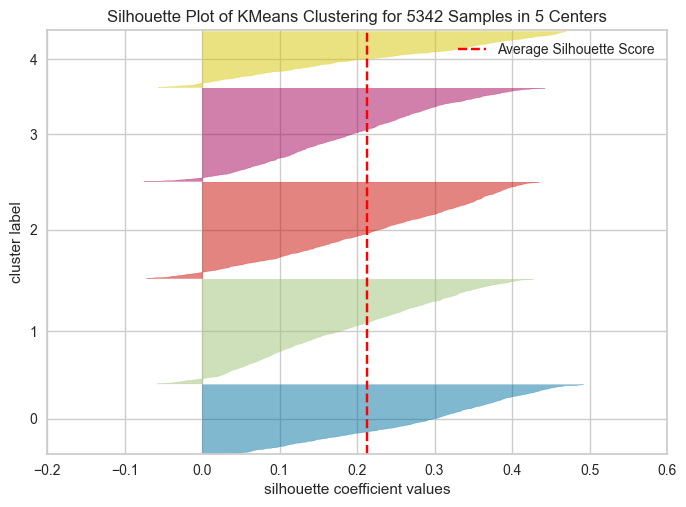

In [16]:
#PyCaret_PlotClustering
#Plot silhouette
#Show plot 
plot_model(pyc_clustering_model_id3, plot='silhouette')

*Fig. 12 Clustering Silhouette Plot*

## 5. Discussion

### 5.1 Applications of Clustering in Built Environment

The clustering algorithm can group similar indoor temperature and humidity conditions and identify distinct clusters that correspond to different levels of comfort. For example, one cluster might correspond to a comfortable indoor environment, while another cluster might correspond to an uncomfortable environment. Using the living room as an example, the indoor thermal environment is categorised as shown in the Figure 13, and the following shows the main findings identified from the clustering results. The implementation of the algorithm is presented at the end of the subsection.

1. The second category, with temperatures around 22 degrees and relative humidity between 50% and 55%, may still be the most comfortable for most people. However, the other categories provide more specific information on temperature and humidity ranges that can affect comfort. For example, the fourth and fifth categories with cooler temperatures and moderate humidity levels may be suitable for some occupants, while others may find them too cold.

2. Most of the data points for this building are not in the thermal comfort zone recommended in CIBSE Guide A [23]. This could be because the building is in mei no occupant s time most of the time, the indoor thermal environment is free floating and no HVAC system is working. It could also be due to the building's poor envelope performance and low HVAC system efficiency. The engineer could improve the indoor environment of the building based on this finding.

By analyzing these clusters and identifying the features that differentiate them, it is possible to gain insights into the factors that affect indoor comfort, such as temperature, humidity, air quality, and ventilation. This information can be used to improve the design and operation of indoor environments, such as adjusting thermostat settings, improving ventilation, and selecting appropriate materials and equipment.

In addition, the clustering algorithm can help identify outliers or unusual patterns in indoor environments that may indicate problems or issues with indoor comfort, such as areas with consistently high humidity or temperature fluctuations. This information can be used to target specific areas for remediation and improve overall indoor comfort and quality.

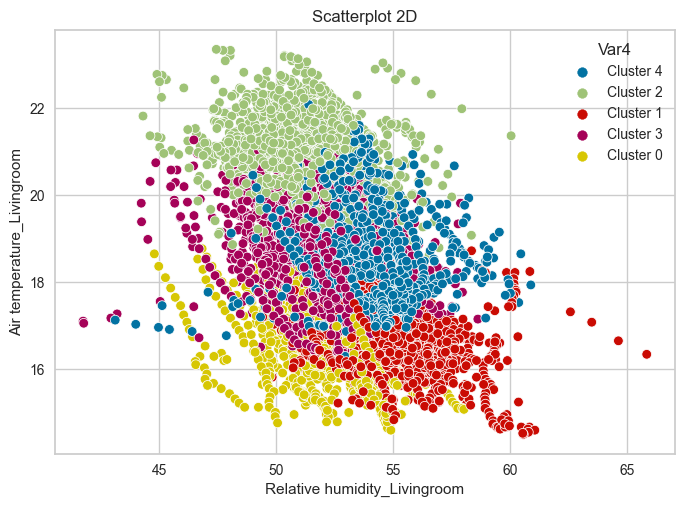

In [22]:
%matplotlib inline

g =sea.scatterplot(x="Relative humidity_Livingroom", y="Air temperature_Livingroom",
              hue="Cluster",
              data=clustering_results_id3)

# Set plot title
plt.title('Scatterplot 2D')
# Set x-axis label
plt.xlabel('Relative humidity_Livingroom')
# Set y-axis label
plt.ylabel('Air temperature_Livingroom')
# Set legend title
plt.legend(title='Var4')

# Example of 3D extension of scatterplots
# https://stackabuse.com/seaborn-scatter-plot-tutorial-and-examples/

*Fig. 13 Thermal zone of living room*

### 5.2 Limitation

There are some limitations to the study, and they are listed below:

1. Limited Features: Indoor temperature and humidity are important factors that affect human comfort, but they are not the only factors. Other factors, such as air quality, lighting, noise levels, and occupancy patterns, can also have a significant impact on indoor comfort. Using only temperature and humidity to cluster indoor comfort may not capture the full range of factors that contribute to human comfort.

2. Subjectivity: Comfort is a subjective experience that can vary widely from person to person. A temperature and humidity combination that is comfortable for one person may not be comfortable for another. Therefore, clustering based on these features alone may not fully capture the subjective experience of indoor comfort.

3. Lack of Interpretability: Unsupervised learning models can group similar data points, but they do not provide information on why these data points are similar or how they relate to other features. This lack of interpretability can make it challenging to draw meaningful insights from the clustering results.

## 6. Conclusion

This report investigates the application of clustering algorithms in the field of smart buildings through a case study. The report uses the k-means algorithm to cluster indoor thermal environments into five groups based on indoor temperature and indoor humidity. The analysis of the results shows that these five groups of indoor thermal environments may represent different levels of thermal comfort and that engineers can use this finding to adjust the building's indoor environment to improve indoor comfort and energy efficiency. This report also discusses some of the limitations, such as the limited number of features, the varying sensitivity of people to indoor comfort, and the lack of translatability of the clustering results. In further work, it is proposed to use additional features such as indoor air quality, noise levels, etc. to cluster indoor environments. Also, subjective comfort feedback from different people in different indoor thermal categories could be investigated to analyse the interpretability of the clustering results.